### purpose

validate RONA offset for complex sims

In [1]:
from pythonimports import *
from myfigs import histo_box, adjust_box_widths

import MVP_03_validate_gradient_forests as mvp03
import MVP_15_climate_outlier_validate_GF as mvp15
import MVP_summary_functions as mvp

import seaborn as sns
import matplotlib.colors as mcolors

t1 = dt.now()  # notebook timer

outerdir = '/home/b.lind/offsets/run_20220919_tutorial'
tdir = '/home/b.lind/offsets/run_20220919_tutorial/tutorial'

rona_training_dir = op.join(outerdir, 'RONA/training/training_files')
rona_outdir = rona_training_dir.replace('/training_files', '/training_outfiles')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	August 09, 2023 - 13:38:59 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



# get pop data

get subpop locations to fill in heatmaps later on

In [2]:
inds = pd.read_table(f'{outerdir}/tutorial/My_Individuals.txt')

inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0


In [3]:
locations = inds.groupby('subpopID')[['lon', 'lat']].apply(np.mean)

locations

,lon,lat
subpopID,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
...,...,...
96,6.0,10.0
97,7.0,10.0
98,8.0,10.0


# get fitness

get fitness of each pop (column) in each garden (row)

In [4]:
mvp15.fitness_dir = '/home/b.lind/offsets/run_20220919_tutorial/tutorial/fitness_mats'

fitness = mvp15.get_fitness(
    seeds=['tutorial'],
)['tutorial']  # mv15.get_fitness returns a dict, with a key for each seed in `seeds` kwarg

fitness.index = fitness.index.astype(int)

fitness = fitness.loc[sorted(fitness.index)]

fitness.index = fitness.index.astype(int)

fitness


Reading fitness matrices ...


100%|███████████████| 1/1 [00:00<00:00,  2.22it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.982222,0.924615,0.612,0.431,0.500000,0.660000,0.894444,0.878889,0.752667,0.731,0.862857,0.738889,0.49375,0.41500,0.568889,0.790833,0.809091,0.722,0.598182,0.608182,0.6625,0.598333,0.502857,0.422308,0.659167,0.781667,0.77250,0.618889,0.559231,0.532727,0.45625,0.472143,0.438,0.535556,0.705455,0.824286,0.690000,0.65875,0.483,0.526667,0.41750,0.461,0.496667,0.6425,0.732500,0.788571,0.709,0.616667,0.460,0.514286,0.42750,0.483,0.576364,0.723077,0.751818,0.75000,0.641429,0.524286,0.441538,0.483333,0.478462,0.522857,0.73250,0.742727,0.72000,0.666842,0.460,0.38375,0.45500,0.3875,0.48875,0.554000,0.616667,0.680000,0.669375,0.601818,0.410909,0.425714,0.432222,0.377778,0.498571,0.578,0.646,0.633846,0.669,0.529091,0.430,0.454444,0.419333,0.345,0.543333,0.620000,0.650000,0.656667,0.550000,0.483,0.474286,0.483077,0.388571,0.352308
2,0.965556,0.978462,0.748,0.576,0.641429,0.779167,0.906667,0.923333,0.863333,0.842,0.937143,0.868889,0.64625,0.55500,0.705556,0.859167,0.812727,0.780,0.715455,0.700000,0.8000,0.750000,0.648571,0.543077,0.779167,0.818333,0.75125,0.692222,0.667692,0.622727,0.59500,0.617143,0.569,0.678889,0.817273,0.834286,0.685833,0.74250,0.576,0.618889,0.55250,0.588,0.618889,0.7750,0.830000,0.815714,0.736,0.712000,0.542,0.592857,0.55125,0.601,0.679091,0.826154,0.840909,0.82000,0.714286,0.611429,0.520000,0.548889,0.606154,0.634286,0.78625,0.796364,0.79875,0.768947,0.547,0.46125,0.51625,0.4350,0.60625,0.653333,0.674667,0.730000,0.767500,0.710909,0.490909,0.491429,0.481111,0.420000,0.614286,0.662,0.685,0.703077,0.773,0.628182,0.511,0.511111,0.450667,0.377,0.655556,0.685789,0.696667,0.731111,0.640000,0.566,0.548571,0.520000,0.411429,0.379231
3,0.730000,0.825385,0.890,0.871,0.882857,0.874167,0.692222,0.695556,0.810667,0.789,0.827143,0.908889,0.92000,0.84000,0.912222,0.830833,0.642727,0.654,0.761818,0.700000,0.9200,0.952500,0.921429,0.803077,0.920000,0.691667,0.55250,0.637778,0.755385,0.656364,0.81250,0.874286,0.846,0.903333,0.891818,0.674286,0.520833,0.73250,0.642,0.685556,0.81000,0.830,0.840000,0.9175,0.860833,0.677143,0.593,0.706000,0.573,0.645714,0.80750,0.825,0.814545,0.874615,0.820000,0.74000,0.671429,0.618571,0.548462,0.598889,0.830000,0.820000,0.70250,0.705455,0.73000,0.746842,0.570,0.49375,0.55125,0.5100,0.78750,0.786000,0.655333,0.636667,0.743750,0.733636,0.541818,0.525714,0.518333,0.487778,0.800000,0.732,0.584,0.630000,0.770,0.662727,0.571,0.545556,0.476000,0.434,0.811111,0.646316,0.600000,0.686667,0.663333,0.620,0.612857,0.534615,0.444286,0.434615
4,0.496667,0.587692,0.800,0.964,0.927143,0.744167,0.468889,0.453333,0.616000,0.635,0.612857,0.747778,0.90750,0.97625,0.890000,0.650833,0.445455,0.459,0.630909,0.606364,0.7975,0.871667,0.928571,0.943077,0.814167,0.496667,0.37125,0.481111,0.697692,0.594545,0.81875,0.917143,0.976,0.896667,0.756364,0.465714,0.352500,0.58000,0.605,0.653333,0.93500,0.946,0.933333,0.8125,0.703333,0.482857,0.411,0.571333,0.527,0.621429,0.95125,0.931,0.850909,0.718462,0.640000,0.55625,0.520000,0.517143,0.506923,0.594444,0.923846,0.888571,0.54875,0.523636,0.54000,0.574211,0.502,0.46125,0.53500,0.5450,0.85750,0.816667,0.570667,0.462222,0.572500,0.605455,0.523636,0.502857,0.512222,0.513333,0.870000,0.712,0.424,0.460000,0.606,0.591818,0.562,0.536667,0.481333,0.465,0.854444,0.532632,0.428333,0.526667,0.601111,0.597,0.620000,0.517692,0.451429,0.465385
5,0.557778,0.651538,0.836,0.956,0.948571,0.830833,0.542222,0.531111,0.698667,0.732,0.680000,0.807778,0.94250,0.96250,0.916667,0.727500,0.533636,0.558,0.728182,0.710909,0.8750,0.918333,0.921429,0.910769,0.859167,0.595833,0.46000,0.590000,0.799231,0.703636,0.88875,0.947857,0.967,0.944444,0.830909,0.554286,0.444167,0.67625,0.713,0.757778,0.95500,0.954,0.947778,0.8800,0.781667,0.5

# validate

In [5]:
vmin = math.inf
vmax = -math.inf

heatmaps = wrap_defaultdict(lambda: mvp03.blank_dataframe(), 2)

validation = pd.DataFrame(columns=['seed', 'marker_set', 'program', 'garden', 'score', 'env'])
for marker_set in pbar(['all', 'adaptive', 'neutral']):
    rona = pklload(op.join(rona_outdir, f'tutorial_{marker_set}_RONA_results.pkl'))

    for env, rona_dict in rona.items():
        rona_offset = pd.DataFrame(rona_dict).T

        # validate using all populations
        score_dict = rona_offset.corrwith(fitness, axis=1, method='kendall')
        
        for garden, score in score_dict.items():
            lon, lat = locations.loc[int(garden)]
            heatmaps[marker_set][env].loc[lat, lon] = score
            
            if score > vmax:
                vmax = score
            if score < vmin:
                vmin = score
            
            validation.loc[nrow(validation), : ] = ('tutorial', marker_set, 'RONA', garden, score, env)
            
validation['program'] = 'RONA'

100%|███████████████| 3/3 [00:01<00:00,  1.95it/s]


In [6]:
validation.score.isnull().sum()

0

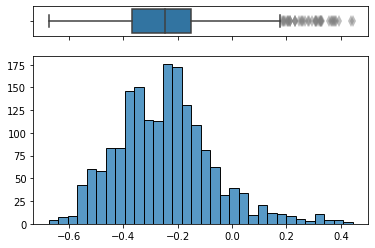

(<AxesSubplot:>, <AxesSubplot:>)

In [7]:
histo_box(validation.score)

# visualize

In [8]:
def show_heatmaps(vmin=None, vmax=None):
    axes = []
    for (marker_set, env), heatmap in unwrap_dictionary(heatmaps):
        g = sns.heatmap(heatmap,
                        vmin=vmin,
                        vmax=vmax,
                        cmap='viridis',
                        cbar_kws={'label': "Kendall's $\\tau$"})

        g.set(title=f'{marker_set} {env}')

        g.figure.axes[-1].yaxis.label.set_size(15)

        plt.show()

        axes.append(g.figure.axes[0])
    
    return axes

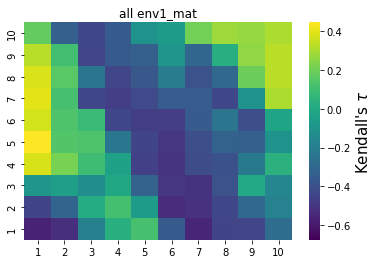

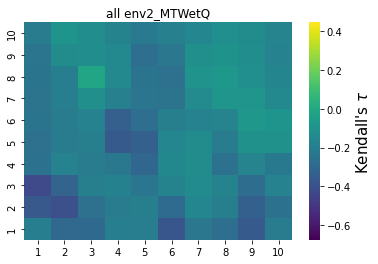

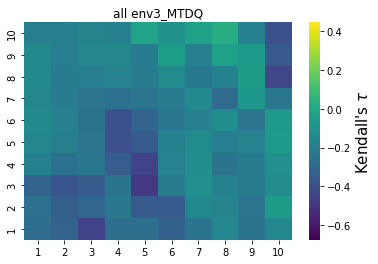

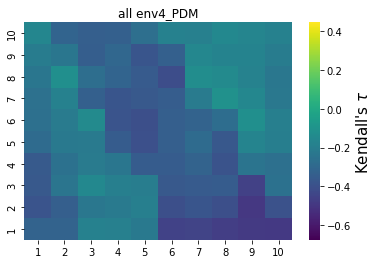

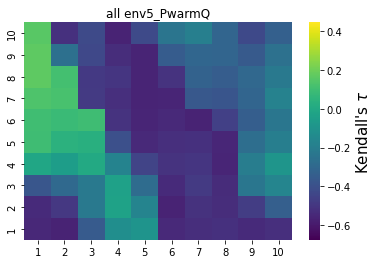

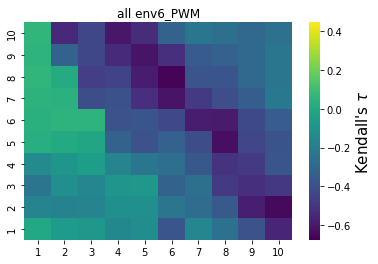

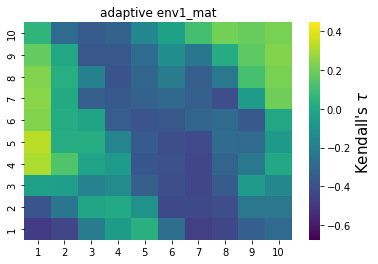

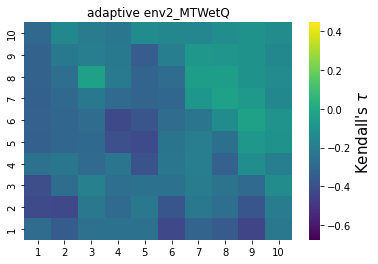

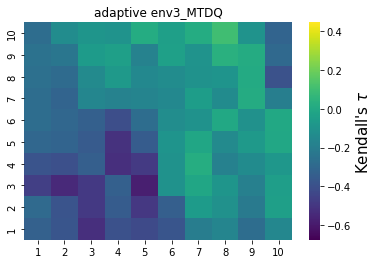

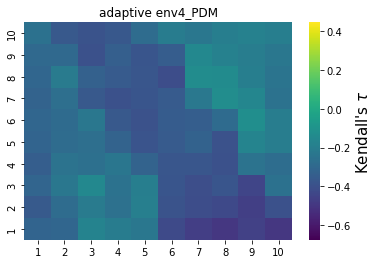

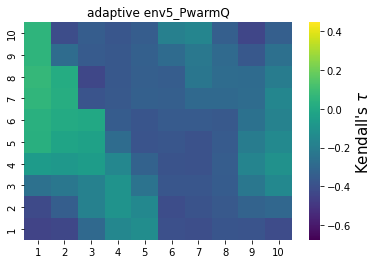

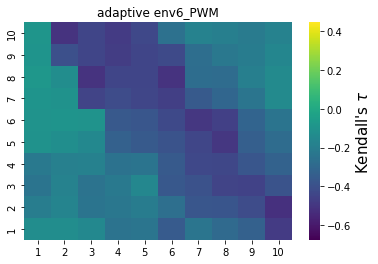

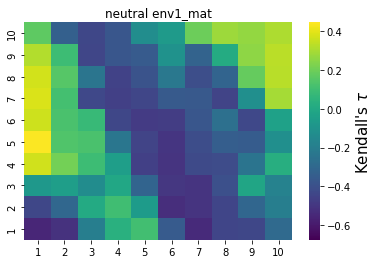

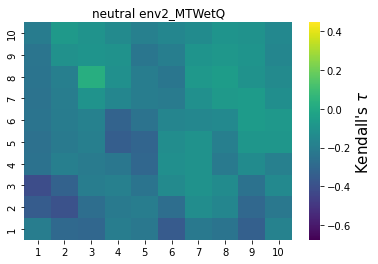

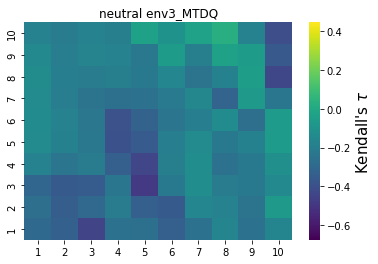

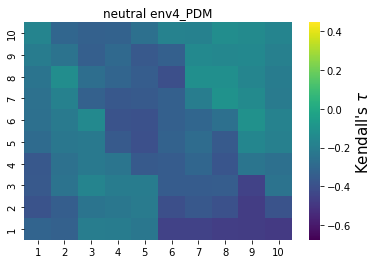

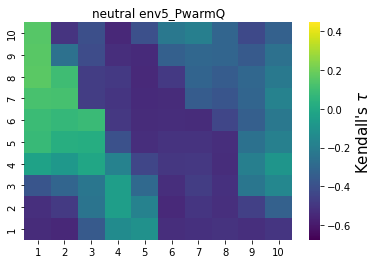

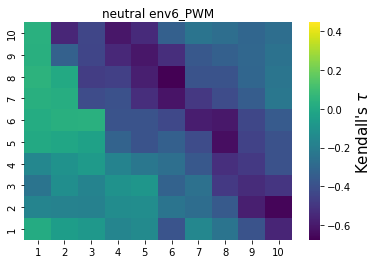

In [9]:
# with constant colorbar range
axes = show_heatmaps(vmin=vmin, vmax=vmax)

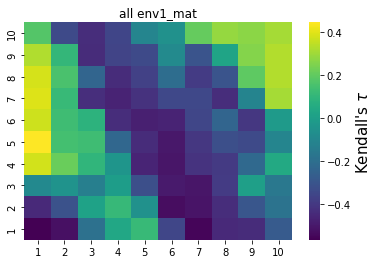

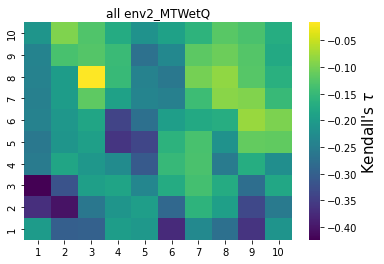

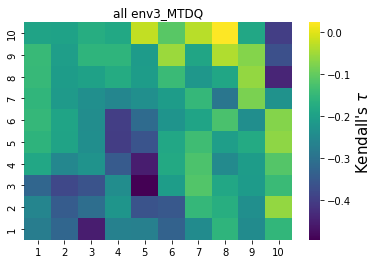

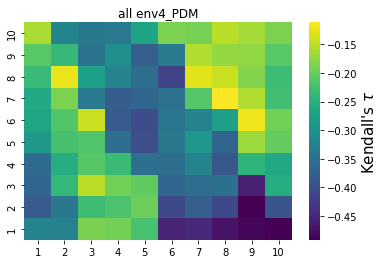

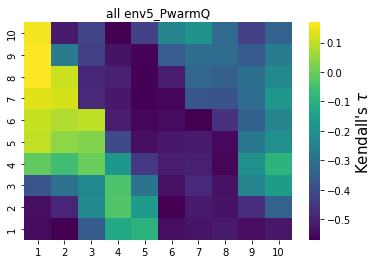

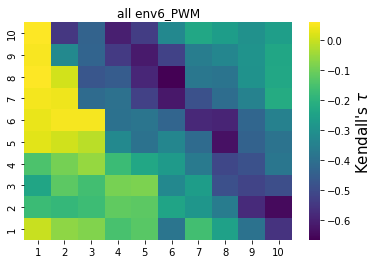

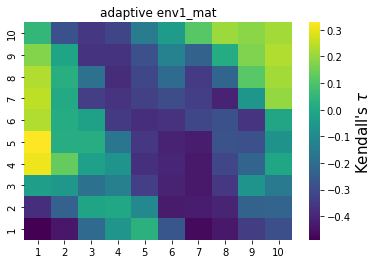

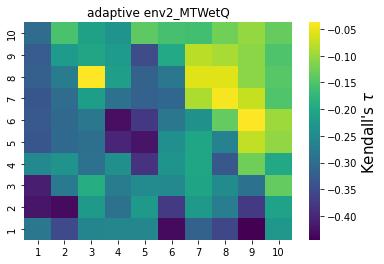

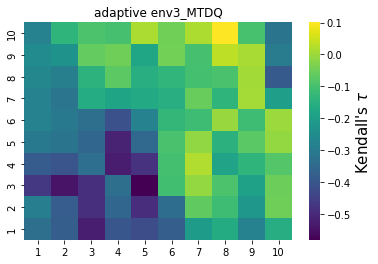

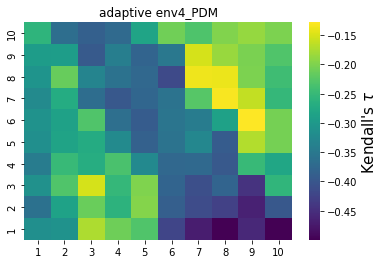

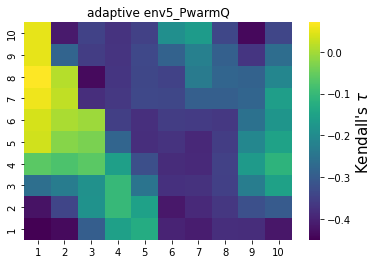

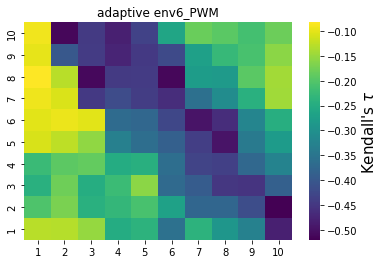

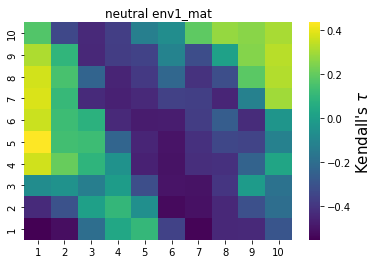

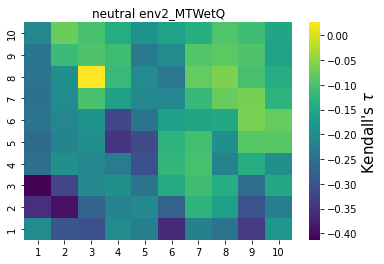

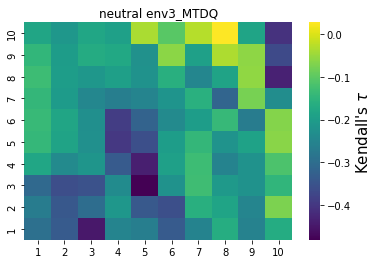

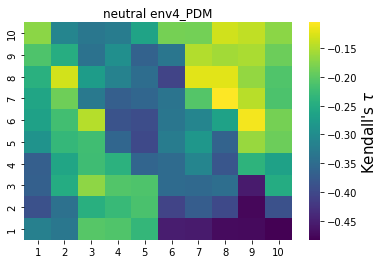

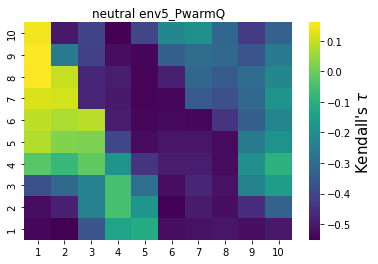

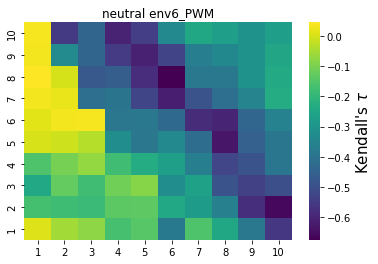

In [10]:
# without constant colorbar range (to highlight patterns)
axes = show_heatmaps()

In [11]:
vmin, vmax

(-0.6748863923759398, 0.44437710438019856)

### boxplots

no need to compare to GF and RDA, which are doing way better

In [12]:
for i, env in enumerate(validation.env.unique()):
    color = keys(mcolors.TABLEAU_COLORS)[i]
    mvp.boxplot_kwargs['palette'][env] = color
    
    print(ColorText(env).custom(color).bold())

env1_mat
env2_MTWetQ
env3_MTDQ
env4_PDM
env5_PwarmQ
env6_PWM


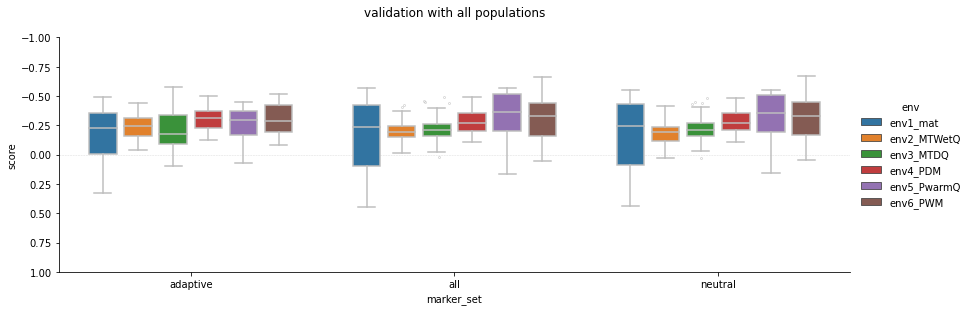

In [13]:
g = sns.catplot(data=validation,
                x='marker_set',
                y='score',
                order=mvp.hue_order['marker_set'],
#                 order=['adaptive', 'all', 'neutral', 'rda_outliers'],
                kind='box',
                hue='env',
#                 hue_order=mvp.hue_order['program'],
#                 hue_order=[
# #                     'RONA',
# #                     'RONA-sal_opt',
# #                     'RONA-temp_opt',
# #                     'lfmm2',
#                     'rda-nocorr',
#                     'rda-structcorr',
# #                     'rda',
#                     'GF'
#                 ],
                **mvp.boxplot_kwargs,
                height=4,
                aspect=3
               )

adjust_box_widths(list(g.axes[0]), 0.8)
mvp.jitter_fliers(g)

g.set(ylim=(1, -1),
      title='validation with all populations\n')

for ax in g.axes[0]:
    ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)

plt.show()

# save

In [14]:
validation_dir = makedir(f'{outerdir}/RONA/validation')

f = f'{validation_dir}/tutorial_validation_scores.txt'

validation.to_csv(f, sep='\t', index=False, header=True)

f

'/home/b.lind/offsets/run_20220919_tutorial/RONA/validation/tutorial_validation_scores.txt'

In [15]:
formatclock(dt.now() - t1)

'0-00:00:11'